<a href="https://colab.research.google.com/github/akshitafr/akshitafr/blob/main/ann_churn_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Churn Modelling** 
Name: Akshita Saxena <br>
PRN : 20070243002

In [1]:
#importing the necessary libraries

import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras as tk
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#checking for the versions 
print(np.__version__)
print(pd.__version__)
print(tf.__version__)
print(sns.__version__)

1.19.5
1.1.5
2.6.0
0.11.2


In [3]:
dataset = pd.read_csv('Churn_Modelling.csv')

## Data Wrangling

In [4]:
dataset.shape

(10000, 14)

In [5]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
#Renaming some column names

dataset = dataset.rename(columns = {'NumOfProducts': 'ProductCount', 'IsActiveMember':'Active'})
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,ProductCount,HasCrCard,Active,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [7]:
# Deleting the columns which are useless as they don't affect the exit rate

dataset.drop(['RowNumber','CustomerId','Surname'],axis=1, inplace=True)
dataset

,CreditScore,Geography,Gender,Age,Tenure,Balance,ProductCount,HasCrCard,Active,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [8]:
#checking for the missing values
dataset.isnull().sum().to_frame(name ='null_values')

,null_values
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
ProductCount,0
HasCrCard,0
Active,0
EstimatedSalary,0


## **Exploratory Data Analysis**

In [9]:
len(dataset.columns)

11

In [10]:
dataset.dtypes.to_frame(name = 'Data Type')

,Data Type
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
ProductCount,int64
HasCrCard,int64
Active,int64
EstimatedSalary,float64


***There are 2 categorical columns, rest 9 are integer type***


---



In [12]:
dataset.describe()

,CreditScore,Age,Tenure,Balance,ProductCount,HasCrCard,Active,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


***Credit Score is between 350-850 and average credit score is 650.52<br>
People are between the age group 18-92 and average age is 39 <br>
Balance is in the range 0-2.5 lacs and average balance is 62k<br>
Estimated Salary is in between 11- 1.99 lacs***

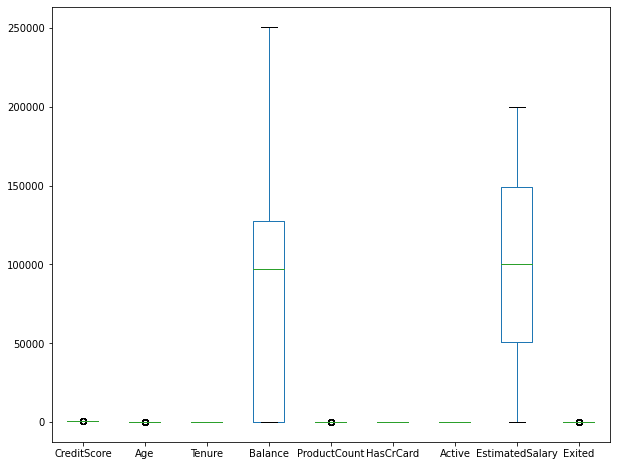

In [11]:
#BoxPlot to detect outliers
dataset.plot(kind = 'box', figsize = (10,8))

1048 people in the data have Tenure of: 2 years.


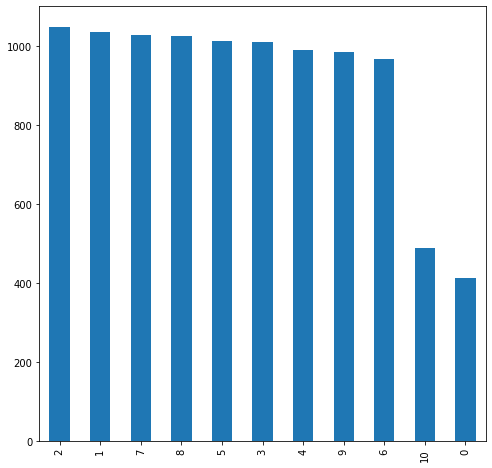

In [13]:
dataset.Tenure.value_counts().plot(kind = 'bar', figsize = (8,8,))
mode_tenure = dataset.Tenure.mode()
print(len(dataset[dataset.Tenure == mode_tenure[0]]),"people in the data have Tenure of:",mode_tenure[0],'years.')

478 people in the data belong to age: 37


Text(0.5, 1.0, 'Distribution of Age')

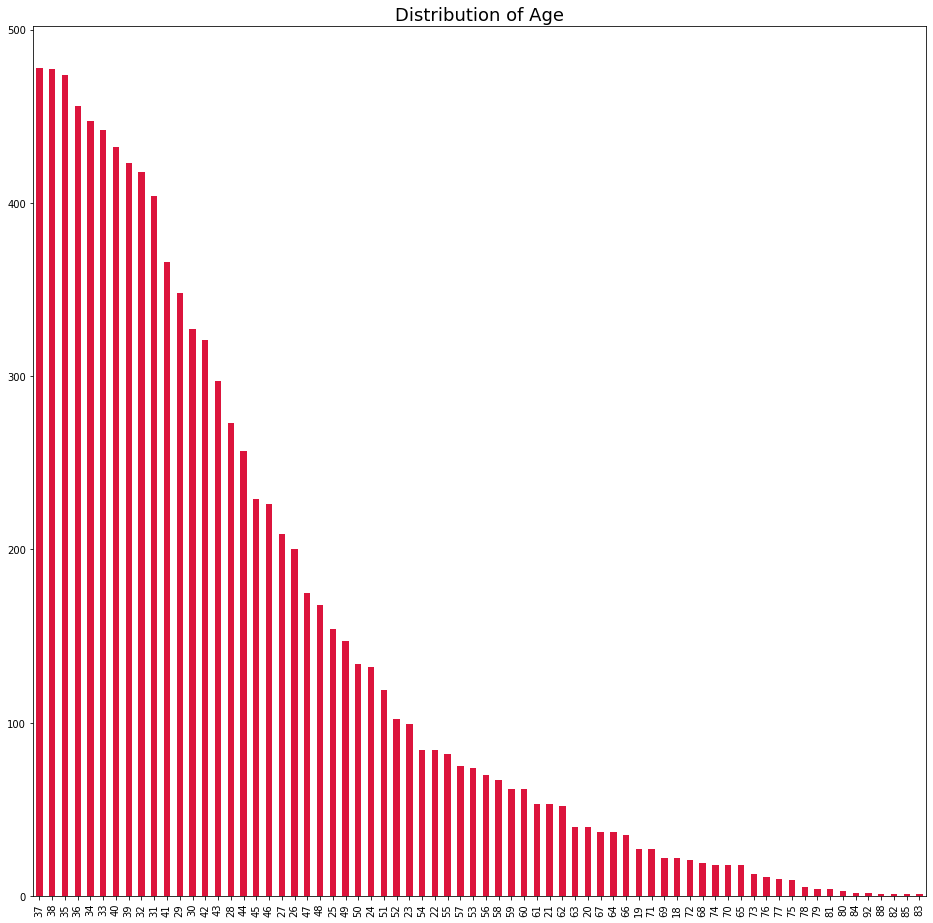

In [15]:
dataset.Age.value_counts().plot(kind = 'bar', figsize = (16,16), color = 'crimson')
mode_age = dataset.Age.mode()
print(len(dataset[dataset.Age == mode_age[0]]),'people in the data belong to age:',mode_age[0])
plt.title("Distribution of Age", fontsize = 18)

5084 people in the data have 1 product.


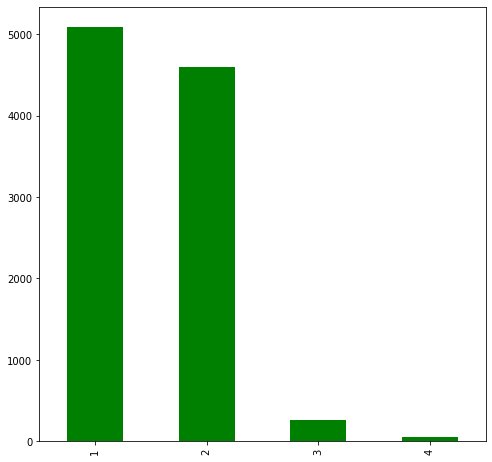

In [103]:
dataset.ProductCount.value_counts().plot(kind = 'bar', color = 'g',figsize = (8,8))
mode_product = dataset.ProductCount.mode()
print(len(dataset[dataset.ProductCount == mode_product[0]]),'people in the data have',mode_product[0],'product.')

***1048 people in the data have Tenure of: 2 years.<br>
478 people in the data belong to age: 37. <br>
5084 people in the data have 1 products.***


---



Has Credit card or not
    HasCrCard
1       7055
0       2945 
************************


Text(0, 0.5, 'Count')

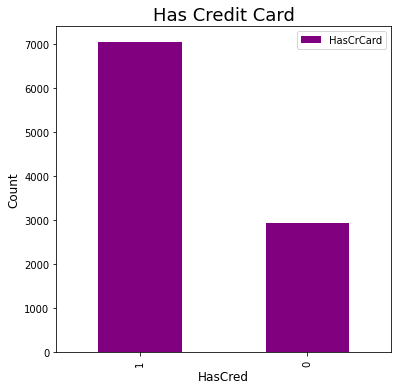

In [24]:
cred_count = dataset.HasCrCard.value_counts().to_frame()
print("Has Credit card or not\n", cred_count,"\n************************")
cred_count.plot(kind = 'bar', color = "purple", figsize=(6, 6))
plt.title("Has Credit Card", fontsize = 18)
plt.xlabel("HasCred", fontsize = 12)
plt.ylabel('Count', fontsize = 12)

Customer Active or not
    Active
1    5151
0    4849 
****************************


Text(0, 0.5, 'Count')

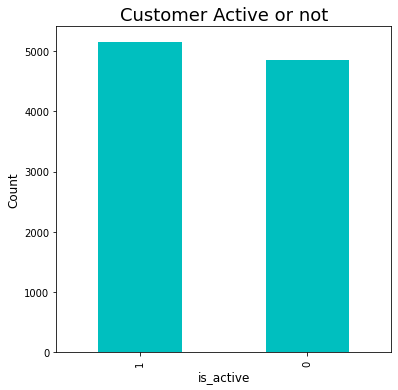

In [104]:
is_active = dataset.Active.value_counts().to_frame()
print("Customer Active or not\n", is_active,"\n****************************")
is_active.plot(kind = 'bar', color = 'c', figsize=(6, 6), legend = False)
plt.title("Customer Active or not",  fontsize=18)
plt.xlabel("is_active", fontsize = 12)
plt.ylabel('Count',fontsize = 12)

Exited
    Exited
0    7963
1    2037 
**********************************


Text(0, 0.5, 'Count')

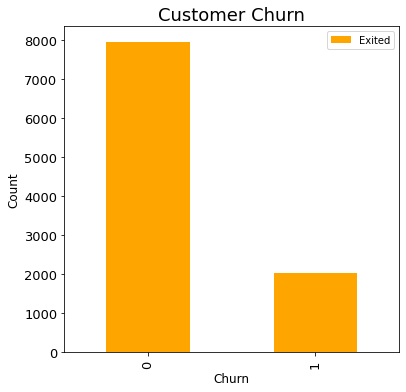

In [26]:
exit = dataset.Exited.value_counts().to_frame()
print("Exited\n", exit,"\n**********************************")
exit.plot(kind = 'bar', color = 'orange', figsize=(6, 6), fontsize=13)
plt.title("Customer Churn", fontsize = 18)
plt.xlabel("Churn", fontsize = 12)
plt.ylabel('Count', fontsize = 12)
#plt.show

***Observation: <br>***
- ***Majority of people (70.55%) have credit card <br>***
- ***Number of Active people and inactive people is fairly equal with active people leading with 302 people <br>***
- ***79.63% people have decided to stay and 20.37% people have left.***



---



In [31]:
#checking for the unique values' description of categorical columns
dataset.describe(include = 'O')

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


***Majority of the people in the dataset live in France and are Male.***

In [32]:
geo = dataset['Geography'].value_counts()

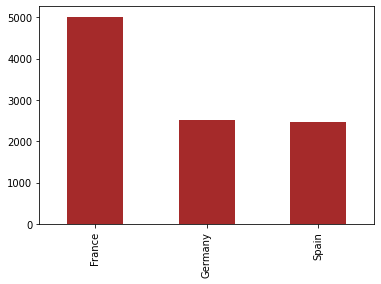

In [33]:
geo.plot(kind = 'bar', color = 'brown')

In [36]:
gen = dataset['Gender'].value_counts().to_frame()
gen

,Gender
Male,5457
Female,4543


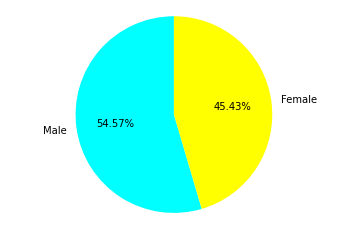

In [37]:
#[5457, 4543]
plt.pie(gen['Gender'], labels=['Male','Female'], colors= ['cyan','yellow'], startangle=90, autopct='%0.2f%%')
plt.axis('equal')
plt.show()

***Taking each column and trying to check relation of it with other columns.***


---

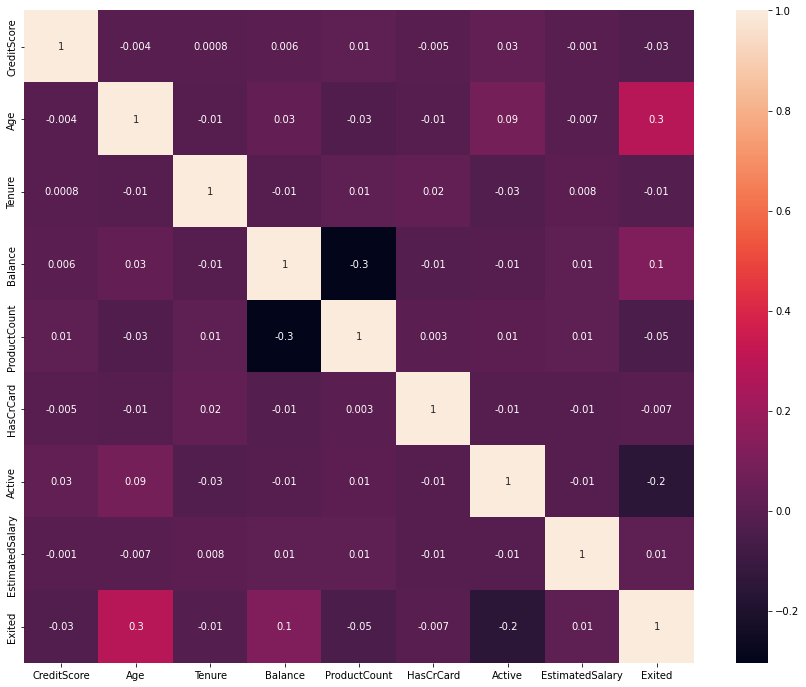

In [39]:
#plt.figure(figsize = (12, 12))
plt.figure(figsize=(15, 12))
sns.heatmap(data=dataset.corr(), annot=True, fmt='.1g')


**1. Age** <br>

There is a positive correlation between Age and Active members and Age and Exited. Let's visualize...

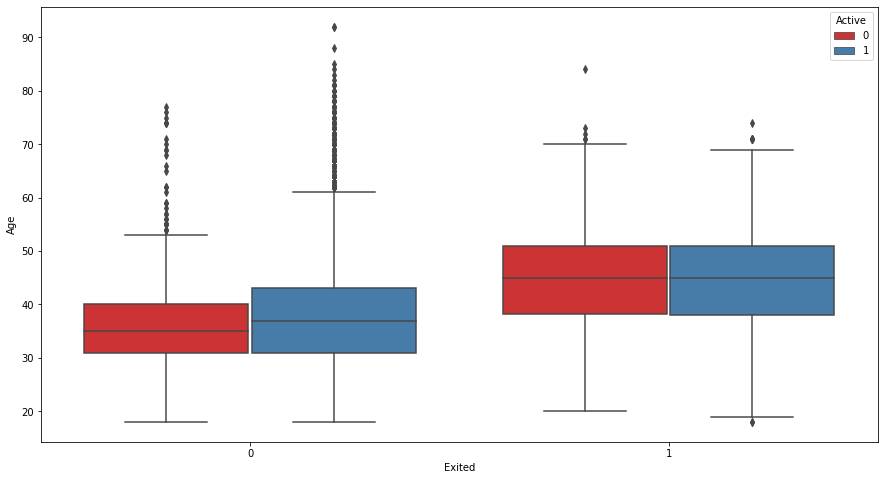

In [42]:
plt.figure(figsize=(15, 8))
sns.boxplot(x="Exited", y= "Age", data= dataset, palette = 'Set1', hue = 'Active')

***There is least possibility of deriving a conclusion here as the boxes are overlapping but the non active people in the age bracket of 30-35 are least likely to churn and the people in the age group of 45-50 whether or not active are more likely to churn.***



---



---



**2. Balance** <br>
Balance is a int type column and has some positive correlation with Age and the dependent variable-**"Exited"** <br>
Let's visualize...

Text(0.5, 1.0, 'Balance - Exited relation')

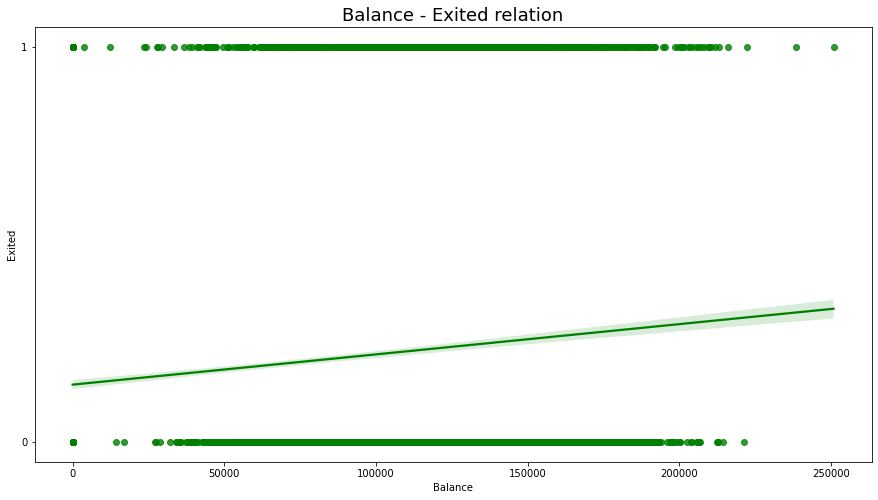

In [105]:
plt.figure(figsize = (15, 8))
sns.regplot(x = 'Balance', y = 'Exited', data = dataset, color='g')
plt.yticks([0, 1])
plt.title("Balance - Exited relation", fontsize = 18)

***There is very little correlation among Age and Balance.***


---



---



**3. Active**

In [70]:
dataset.groupby(["Active","Exited"])['Exited'].count().to_frame()

Exited
Active Exited        
0      0         3547
       1         1302
1      0         4416
       1          735

<Figure size 1080x720 with 0 Axes>

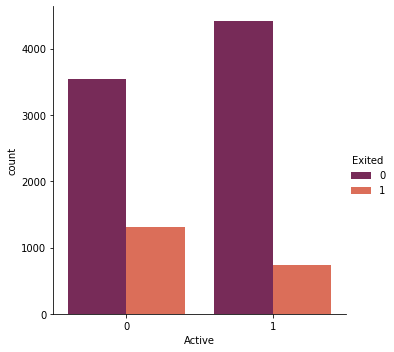

In [67]:
plt.figure(figsize=(15, 10))
sns.catplot(x = 'Active', hue = 'Exited', data = dataset, kind = 'count', legend = True, palette = 'rocket')



---



---



**3. Credit Score** 

Text(0.5, 1.0, 'CreditScore - EstimatedSalary relation')

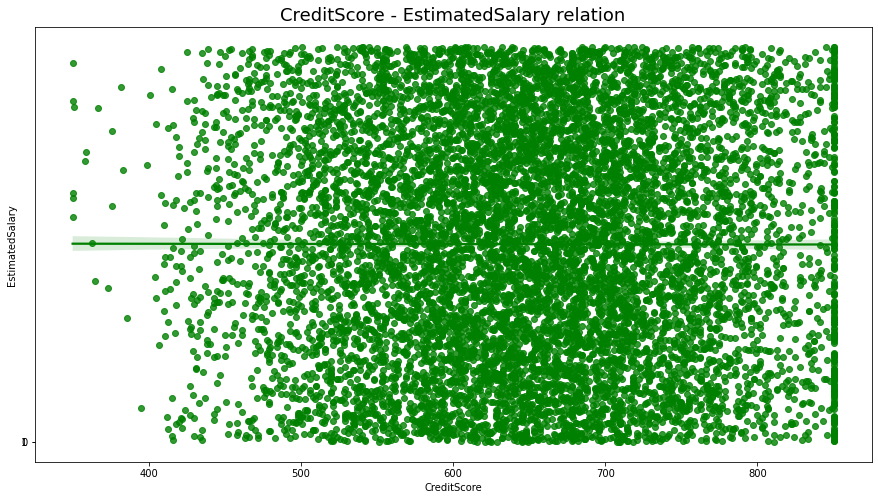

In [111]:
plt.figure(figsize = (15, 8))
sns.regplot(x = 'CreditScore', y = 'EstimatedSalary', data = dataset, color='g')
plt.yticks([0, 1])
plt.title("CreditScore - EstimatedSalary relation", fontsize = 18)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


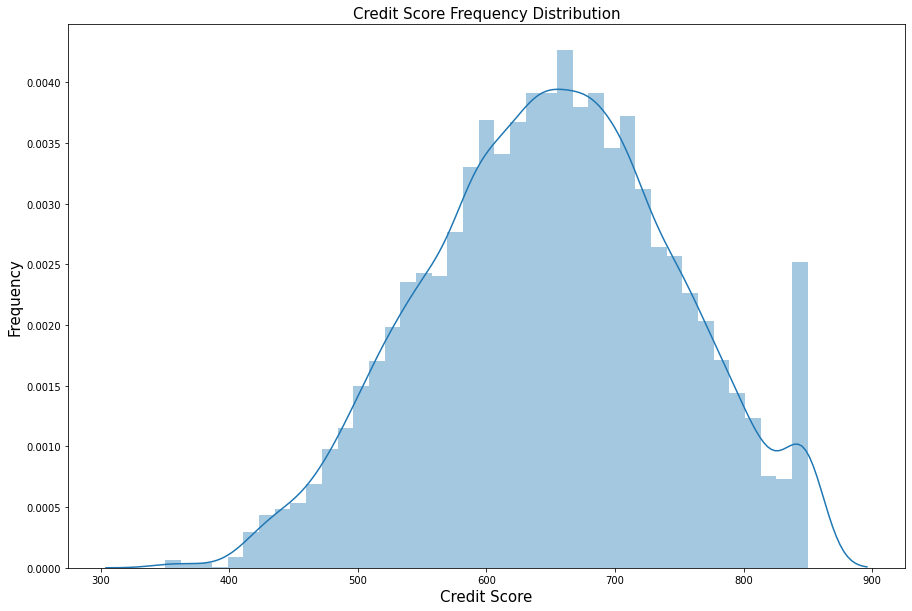

In [73]:
plt.figure(figsize=(15, 10))
sns.distplot(dataset.CreditScore)
plt.ylabel('Frequency', fontsize=15)
plt.xlabel('Credit Score', fontsize=15)
plt.title('Credit Score Frequency Distribution', fontsize=15)
plt.show()

<Figure size 1080x576 with 0 Axes>

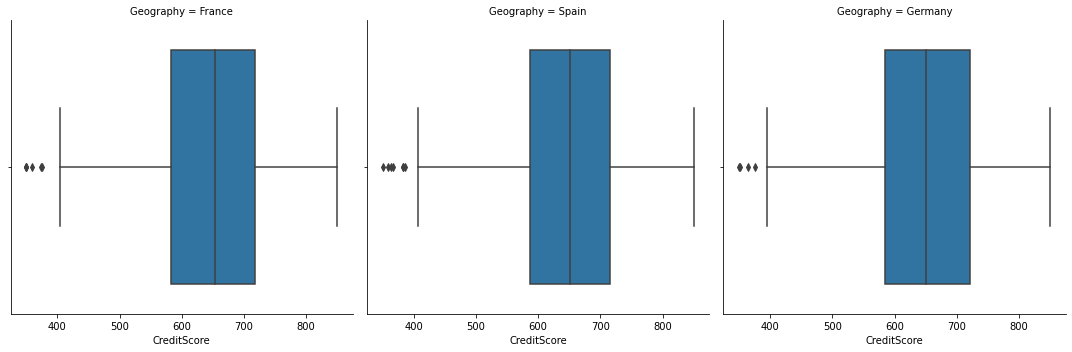

In [75]:
plt.figure(figsize=(15, 8))
sns.catplot(kind='box', x='CreditScore', data= dataset, col='Geography')

***We can see 2 peaks here - around 850 and 650. Most of the credit scores are between 600 and 700, this fact is even evident by the geography. The distribution is normal***

Text(0.5, 1.0, 'Credit Score - Exited ')

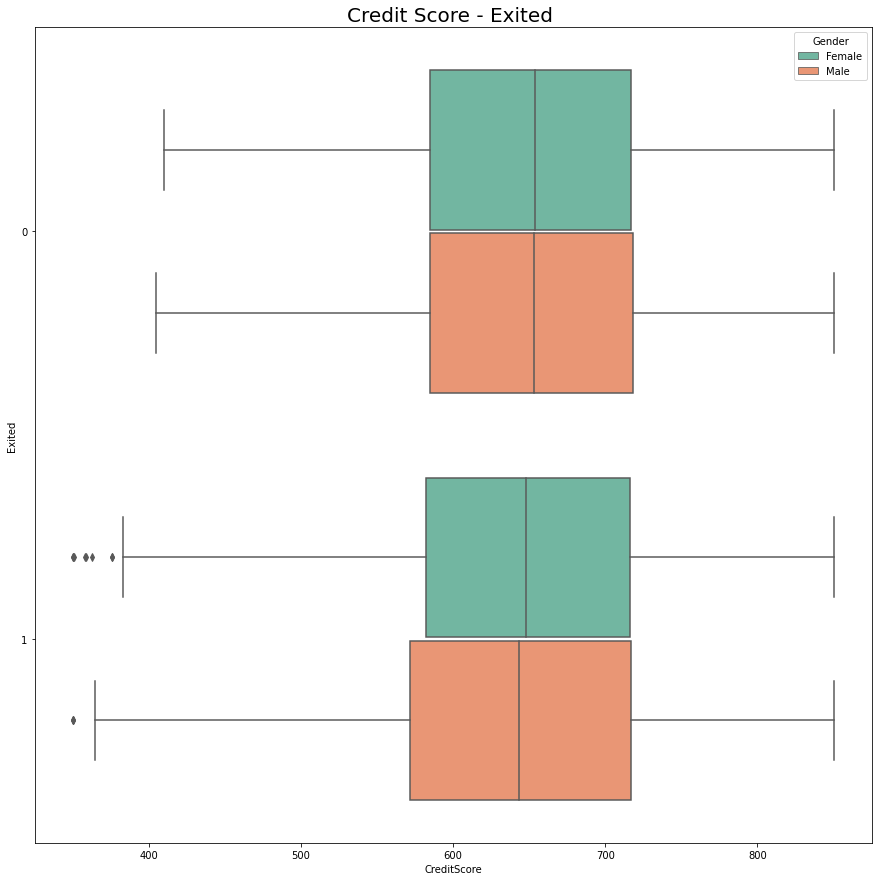

In [106]:
plt.figure(figsize = (15,15))
sns.boxplot(x = 'CreditScore', y = "Exited", data = dataset, hue = 'Gender', palette = 'Set2', orient = 'h')
plt.title('Credit Score - Exited ', fontsize = 20)

***No conclusions here, boxes are overlapping***

---



---



**4. Estimated Salary**

In [107]:
dataset[['Geography','Gender','EstimatedSalary']].groupby(['Geography','Gender']).mean() #,'count'])

EstimatedSalary
Geography Gender                 
France    Female     99564.252755
          Male      100174.252495
Germany   Female    102446.424124
          Male       99905.033959
Spain     Female    100734.107475
          Male       98425.687680

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


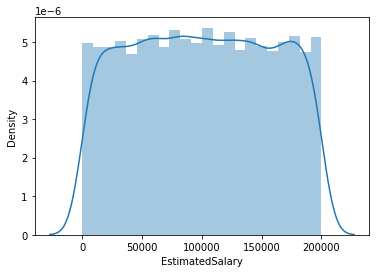

In [84]:
sns.distplot(dataset.EstimatedSalary)

***Negative values of kurtosis indicate that a 
distribution is flat and has thin tails. Platykurtic distributions have negative kurtosis values.***


---



---



**Average credit score of male and female:**


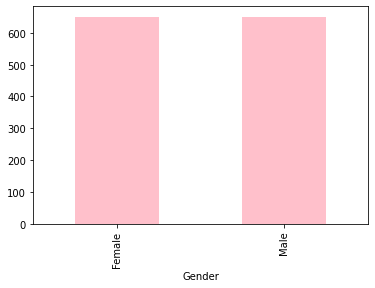

In [32]:
#---average credit score of male and female---
print('**Average credit score of male and female:**')
dataset.groupby(['Gender'])['CreditScore'].mean().plot(kind = 'bar', color = 'pink')
#not very difference in credit score of both genders

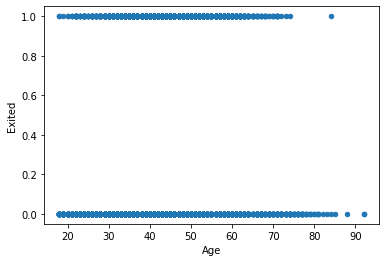

In [ ]:
dataset.plot.scatter(x = 'Age', y = 'Exited')

***This suggests that if the customer is above the age 75, there is minimal chances of churning***

Text(0.5, 1.0, 'Exited - Balance')

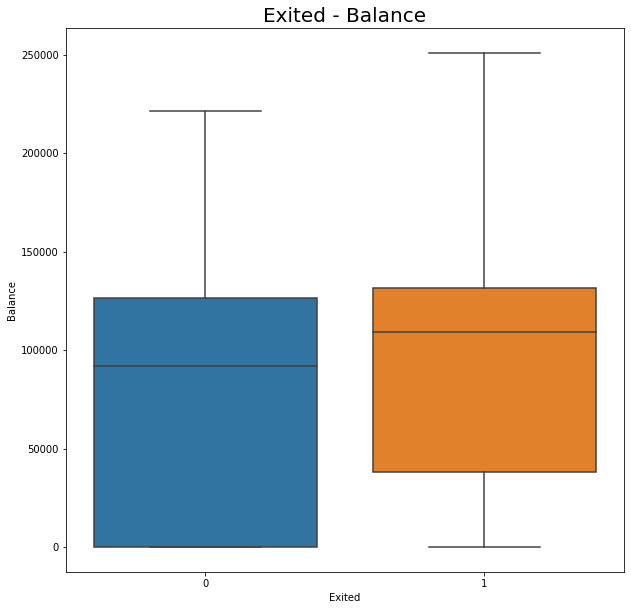

In [108]:
plt.subplots(figsize = (10,10))
sns.boxplot(x = 'Exited',  y = 'Balance', data = dataset)
plt.title('Exited - Balance', fontsize = 20)

***People with '0 - 30,000' balance range are more likely to not exit.***

Maximum credit score: 787.0
index (array([67]),)
max credit score is of people at age : 85 
********************************************


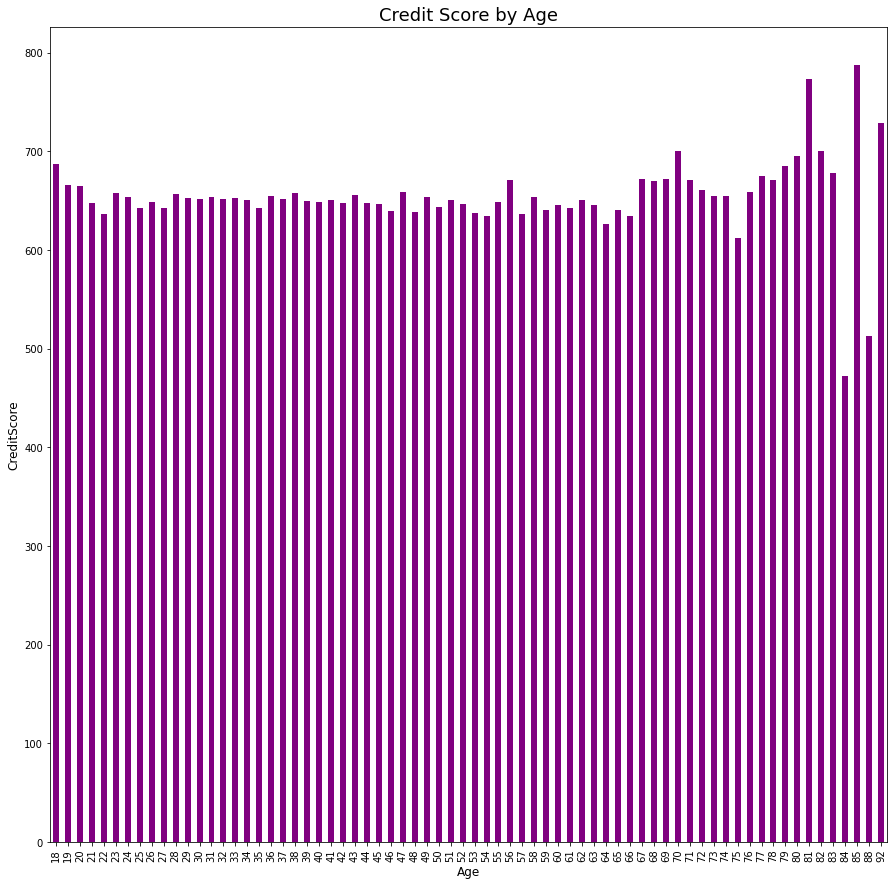

In [102]:
plt.figure(figsize = (15,15))
avg_creditScore = dataset.groupby(['Age'])['CreditScore'].mean()
avg_creditScore.plot(kind = 'bar', color = 'purple')
plt.title("Credit Score by Age", fontsize = 18)
plt.ylabel('CreditScore', fontsize = 12)
plt.xlabel('Age', fontsize = 12)
max_value = max(avg_creditScore)
age = np.where(avg_creditScore == max_value)
print("Maximum credit score:", max_value)
print("index",age)
print("max credit score is of people at age :", avg_creditScore.index[67],'\n********************************************')  
#this shows that the people with max average credit score are of age 85





---


---


**Conclusion: The variables don't seem to have much correlation and influence on the dependent variable**


---


---




#Splitting the data into matrix of features and dependent variable vector

In [112]:
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,-1].values

In [113]:
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [114]:
Y

array([1, 0, 1, ..., 1, 1, 0])

## Encoding the categorical columns


-----------------------------------------
1. Label encoder - If you have 2 categories (may or maynot not in order)then you use this.

2. One hot encoder - more than a number of categories, you use this, which means you're converting a value in the row into a column.

In [115]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,2] = le.fit_transform(X[:,2])
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


In [122]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers = [('encoder',OneHotEncoder(),[1])],remainder = 'passthrough')
X = np.array(ct.fit_transform(X))
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


# Train and test set - to train and validate model

In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.1, random_state = 0)

In [124]:
X_train.shape

(9000, 12)

In [125]:
X_test.shape

(1000, 12)

In [126]:
y_train.shape

(9000,)

In [127]:
y_test.shape

(1000,)

# Feature Scaling

In [128]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Build our ANN model

In [197]:
ann = tf.keras.models.Sequential()
#Hiddenlayer1
ann.add( tf.keras.layers.Dense(units= 9, activation='relu'))
#ann.add(tf.keras.layers.Dropout(0.2))
#Hiddenlayer2
ann.add(tf.keras.layers.Dense(units= 6, activation='sigmoid'))
ann.add(tf.keras.layers.Dense(units= 6, activation='sigmoid'))
#ann.add(tf.keras.layers.Dropout(0.1))
#Hiddenlayer3
#ann.add(tf.keras.layers.Dense(units= 12, activation='relu'))
#ann.add(tf.keras.layers.Dropout(0.5))
#Output layer
ann.add(tf.keras.layers.Dense(units= 1, activation='sigmoid'))

In [198]:
from tensorflow.keras.optimizers import Adam
'''
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay( 0.001,
      decay_steps=(X_train.shape[0]/32)*50,
      decay_rate=1,
      staircase=False)
'''
ann.compile(optimizer= Adam(learning_rate = 0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [200]:
history = ann.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size = 32, epochs = 100, verbose = 0)

In [201]:
y_pred = ann.predict(X_test)
y_pred = (y_pred>0.5)
#print(y_pred)

In [202]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[767  27]
 [109  97]]


0.864

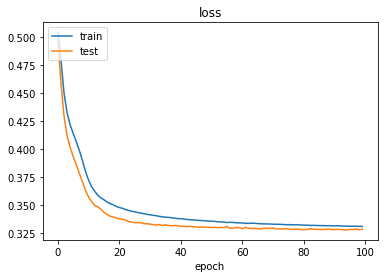

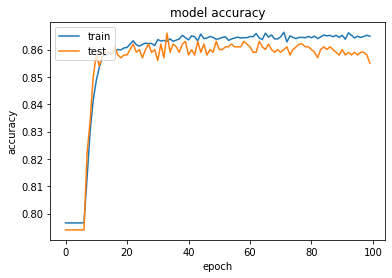

Test Score: 0.3283480405807495


In [190]:
import matplotlib.pyplot as plt

plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) 
plt.title('model loss') 
plt.title('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left') 

plt.figure(2)
plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy']) 
plt.title('model accuracy') 
plt.ylabel('accuracy')
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper left') 
plt.show()

score = ann.evaluate(X_test,y_test,verbose=0)
print('Test Score:',score[0])
#print('Test Accuracy:',score[1])

# Machine Learning Model : Logistic Regression

In [153]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [154]:
y_predict = classifier.predict(X_test)
print(np.concatenate((y_predict.reshape(len(y_predict),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [1 0]]


In [155]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_predict)
print(cm)
accuracy_score(y_test, y_predict)

[[771  23]
 [165  41]]


0.812